In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

%matplotlib inline

### Generate Data

In [43]:
x = list(np.arange(0,1.01,0.01))
y = list(np.zeros(len(x)))
for i in range(len(x)):
    if 0.9 <= x[i] <= 1:
        y[i] = list(np.arange(0,np.sqrt(1 - x[i]**2),0.01))
    else:
        y[i] = list(np.arange(np.sqrt(0.81 - x[i]**2),np.sqrt(1 - x[i]**2),0.01))

df = pd.DataFrame(columns=['x','y'])
for i in range(len(x)):
    for j in range(len(y[i])):
        insert_row = pd.DataFrame([[x[i],y[i][j]]],columns=['x', 'y'])
        df = pd.concat([df, insert_row])

df1 = df.copy()

df.y = -df['y']
df2 = df.copy()

df.x = -df['x']
df3 = df.copy()

df.y = -df['y']
df4 = df.copy()

circle1 = pd.concat([df1,df2,df3,df4])
circle2 = circle1*3

df = pd.concat([circle1, circle2])

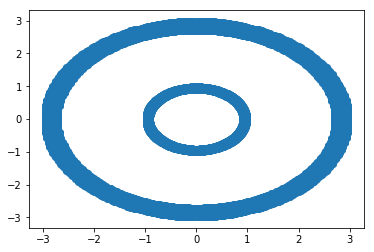

In [44]:
# Plot origin dataframe

plt.scatter(df.x, df.y)

### Spectral Clustring

Paramas Intro:
1. n_cluster: 一共聚几类，即intro里的k | 默认为8
2. affinity: 相似矩阵S的选择 | Default为'rbf'
3. gamma: 当相似矩阵为'RBF'时，该参数即RBF中的gamma。可用cross-validation验证哪个最佳 | Default为1
4. eigen_solver: 用来计算矩阵特征正向量的，当样本数不大即可无视，样本数大可选用其他方法加速矩阵特征分解。 | Default为None
5. n_init: 最后聚类使用K-means的时候用不同初始值组合跑K-means的次数。n_cluster不大时默认就好 | Default为10

Params Return：<br>
该函数直接返回对应行的所属种类的array

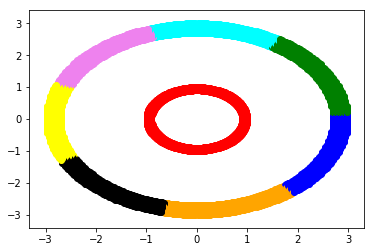

In [84]:
# 使用默认设置时跑出来的结果

# 使用SpectraulClustring
result1 = SpectralClustering().fit_predict(df)

# 生成df
df_result1 = df.copy()
df_result1['cluster'] = result1

# 画出结果
for i in range(len(df_result1)):
    if df_result1.iloc[i,2] == 0:
        plt.scatter(df_result1.iloc[i,0],df_result1.iloc[i,1],c='red')
    elif df_result1.iloc[i,2] == 1:
        plt.scatter(df_result1.iloc[i,0],df_result1.iloc[i,1],c='orange')
    elif df_result1.iloc[i,2] == 2:
        plt.scatter(df_result1.iloc[i,0],df_result1.iloc[i,1],c='yellow')
    elif df_result1.iloc[i,2] == 3:
        plt.scatter(df_result1.iloc[i,0],df_result1.iloc[i,1],c='green')
    elif df_result1.iloc[i,2] == 4:
        plt.scatter(df_result1.iloc[i,0],df_result1.iloc[i,1],c='blue')
    elif df_result1.iloc[i,2] == 5:
        plt.scatter(df_result1.iloc[i,0],df_result1.iloc[i,1],c='cyan')
    elif df_result1.iloc[i,2] == 6:
        plt.scatter(df_result1.iloc[i,0],df_result1.iloc[i,1],c='violet')
    elif df_result1.iloc[i,2] == 7:
        plt.scatter(df_result1.iloc[i,0],df_result1.iloc[i,1],c='black')

# 从结果可以看出，在默认分8类的情况下，聚类结果还是可以的
# 我们可以尝试使用elbow method找到最佳的聚类数量

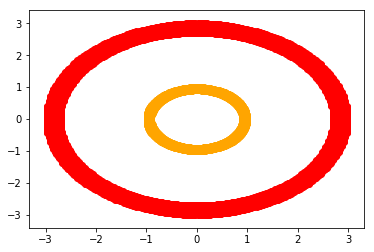

In [85]:
# 使用n_clusters=2

result2 = SpectralClustering(n_clusters=2).fit_predict(df)

df_result2 = df.copy()
df_result2['cluster'] = result2

for i in range(len(df_result2)):
    if df_result2.iloc[i,2] == 0:
        plt.scatter(df_result2.iloc[i,0],df_result2.iloc[i,1],c='red')
    elif df_result2.iloc[i,2] == 1:
        plt.scatter(df_result2.iloc[i,0],df_result2.iloc[i,1],c='orange')

### Elbow Method

1. 选择不同的n_cluster进行聚类
2. 对于每一次的聚类结果，都做如下操作：<br>
    2.1 找出聚类的中心点<br>
    2.2 计算类别内所有点到中心的距离的平方和<br>
    2.3 将所有类别的距离平方和相加<br>
    2.4 以上结果即为n_cluster的WCSS<br>
3. 对不同的n_cluster的WCSS进行画图，找出最优点